<a href="https://colab.research.google.com/github/natadh/APT3025-MachineLearning-/blob/main/Decision_Trees_(Animals).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv('/content/animals.csv', header = 'infer')

In [ ]:
data

,Sr,Hair,Feathers,Eggs,Milk,Airborne,Aquatic,Predator,Teeth,Backbone,Breathes,Venemous,Fins,Legs,Tails,Domestic,Catsize,Class
0,1,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,2,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,3,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,4,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,5,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86,0,0,1,0,0,1,1,0,0,0,0,0,5,0,0,0,7
86,87,0,0,1,0,0,1,1,1,1,0,1,1,0,1,0,1,4
87,88,0,1,1,0,1,1,0,0,1,1,0,0,2,1,0,1,2
88,89,0,0,1,0,0,0,0,0,0,1,0,0,6,0,0,0,6


In [88]:
data['Class'] = data['Class'].replace(['Eggs', 'Aquatic', 'Predator', 'Backbone'], 'Venemous')

In [89]:
data

,Sr,Hair,Feathers,Eggs,Milk,Airborne,Aquatic,Predator,Teeth,Backbone,Breathes,Venemous,Fins,Legs,Tails,Domestic,Catsize,Class
0,1,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,2,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,3,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,4,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,5,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86,0,0,1,0,0,1,1,0,0,0,0,0,5,0,0,0,7
86,87,0,0,1,0,0,1,1,1,1,0,1,1,0,1,0,1,4
87,88,0,1,1,0,1,1,0,0,1,1,0,0,2,1,0,1,2
88,89,0,0,1,0,0,0,0,0,0,1,0,0,6,0,0,0,6


In [90]:
pd.crosstab([data[' Milk'], data[' Airborne']], data['Class'])

Class             1   2  3   4  5  6  7
 Milk  Airborne                        
0     0           0   4  3  12  4  2  9
      1           0  14  0   0  0  5  0
1     0          36   0  0   0  0  0  0
      1           1   0  0   0  0  0  0

In [ ]:
print(data.columns)

In [92]:
print([col for col in data.columns])

['Sr', ' Hair', ' Feathers', ' Eggs', ' Milk', ' Airborne', ' Aquatic', ' Predator', ' Teeth', ' Backbone', ' Breathes', ' Venemous', ' Fins', ' Legs', ' Tails', ' Domestic', ' Catsize', 'Class']


In [93]:
from sklearn import tree

In [94]:
y = data['Class']

In [95]:
y

0     1
1     1
2     4
3     1
4     1
     ..
85    7
86    4
87    2
88    6
89    5
Name: Class, Length: 90, dtype: int64

In [96]:
X = data.drop([' Aquatic', 'Class'], axis=1)

In [97]:
X

,Sr,Hair,Feathers,Eggs,Milk,Airborne,Predator,Teeth,Backbone,Breathes,Venemous,Fins,Legs,Tails,Domestic,Catsize
0,1,1,0,0,1,0,1,1,1,1,0,0,4,0,0,1
1,2,1,0,0,1,0,0,1,1,1,0,0,4,1,0,1
2,3,0,0,1,0,0,1,1,1,0,0,1,0,1,0,0
3,4,1,0,0,1,0,1,1,1,1,0,0,4,0,0,1
4,5,1,0,0,1,0,1,1,1,1,0,0,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86,0,0,1,0,0,1,0,0,0,0,0,5,0,0,0
86,87,0,0,1,0,0,1,1,1,0,1,1,0,1,0,1
87,88,0,1,1,0,1,0,0,1,1,0,0,2,1,0,1
88,89,0,0,1,0,0,0,0,0,1,0,0,6,0,0,0


In [98]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth = 3)

In [99]:
clf # inititialized the DT

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [100]:
clf = clf.fit(X, y)

In [101]:
clf

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [102]:
import pydotplus

In [103]:
from IPython.display import Image

In [104]:
dot_data = tree.export_graphviz(clf, feature_names=X.columns, class_names=['1', '2', '3', '4', '5', '6', '7'], filled=True, out_file=None)

In [105]:
dot_data

'digraph Tree {\nnode [shape=box, style="filled", color="black", fontname="helvetica"] ;\nedge [fontname="helvetica"] ;\n0 [label=" Milk <= 0.5\\nentropy = 2.361\\nsamples = 90\\nvalue = [37, 18, 3, 12, 4, 7, 9]\\nclass = 1", fillcolor="#f8decb"] ;\n1 [label=" Teeth <= 0.5\\nentropy = 2.35\\nsamples = 53\\nvalue = [0, 18, 3, 12, 4, 7, 9]\\nclass = 2", fillcolor="#f4fbe2"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label=" Backbone <= 0.5\\nentropy = 1.463\\nsamples = 34\\nvalue = [0, 18, 0, 0, 0, 7, 9]\\nclass = 2", fillcolor="#e5f6b8"] ;\n1 -> 2 ;\n3 [label="entropy = 0.989\\nsamples = 16\\nvalue = [0, 0, 0, 0, 0, 7, 9]\\nclass = 7", fillcolor="#f9d3e4"] ;\n2 -> 3 ;\n4 [label="entropy = 0.0\\nsamples = 18\\nvalue = [0, 18, 0, 0, 0, 0, 0]\\nclass = 2", fillcolor="#b7e539"] ;\n2 -> 4 ;\n5 [label=" Fins <= 0.5\\nentropy = 1.312\\nsamples = 19\\nvalue = [0, 0, 3, 12, 4, 0, 0]\\nclass = 4", fillcolor="#95f1f0"] ;\n1 -> 5 ;\n6 [label="entropy = 0.985\\nsamples = 7\

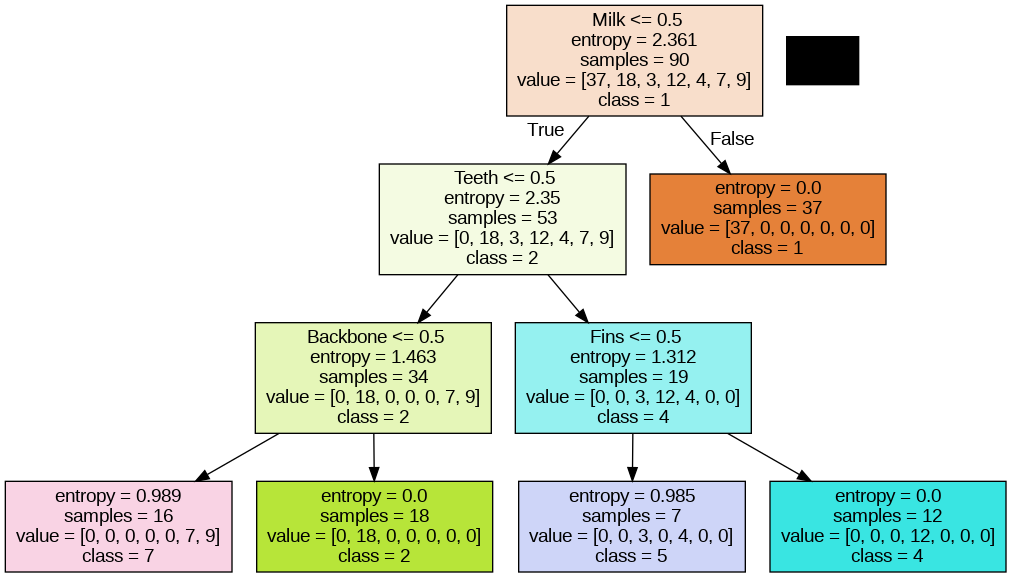

In [106]:
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [107]:
testData =[[91, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 7],
           [92, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 5],
           [93, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 4],
           [94, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 3]]


In [108]:
testData

[[91, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 7],
 [92, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 5],
 [93, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 4],
 [94, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 3]]

In [109]:
data.columns

Index(['Sr', ' Hair', ' Feathers', ' Eggs', ' Milk', ' Airborne', ' Aquatic',
       ' Predator', ' Teeth', ' Backbone', ' Breathes', ' Venemous', ' Fins',
       ' Legs', ' Tails', ' Domestic', ' Catsize', 'Class'],
      dtype='object')

In [110]:
testData = pd.DataFrame(testData, columns=data.columns)

In [111]:
testData

,Sr,Hair,Feathers,Eggs,Milk,Airborne,Aquatic,Predator,Teeth,Backbone,Breathes,Venemous,Fins,Legs,Tails,Domestic,Catsize,Class
0,91,0,0,0,0,1,1,0,1,0,0,0,0,1,1,0,1,7
1,92,0,0,0,1,1,1,0,1,0,1,0,0,1,0,0,1,5
2,93,1,1,0,0,1,1,0,1,0,1,1,0,1,0,1,1,4
3,94,1,0,0,0,1,1,0,1,1,1,0,0,1,1,0,1,3


In [112]:
testY = testData['Class']

In [113]:
testY

0    7
1    5
2    4
3    3
Name: Class, dtype: int64

In [114]:
testX = testData.drop(['Class'], axis=1)

In [115]:
testX

,Sr,Hair,Feathers,Eggs,Milk,Airborne,Aquatic,Predator,Teeth,Backbone,Breathes,Venemous,Fins,Legs,Tails,Domestic,Catsize
0,91,0,0,0,0,1,1,0,1,0,0,0,0,1,1,0,1
1,92,0,0,0,1,1,1,0,1,0,1,0,0,1,0,0,1
2,93,1,1,0,0,1,1,0,1,0,1,1,0,1,0,1,1
3,94,1,0,0,0,1,1,0,1,1,1,0,0,1,1,0,1


In [116]:
missing_columns = set(clf.feature_names_in_) - set(testX.columns)
extra_columns = set(testX.columns) - set(clf.feature_names_in_)

print("Missing columns in testX:", missing_columns)
print("Extra columns in testX:", extra_columns)

# Ensuring that the columns are in the same order
print("Columns in trainX:", clf.feature_names_in_)
print("Columns in testX:", testX.columns)


Missing columns in testX: set()
Extra columns in testX: {' Aquatic'}
Columns in trainX: ['Sr' ' Hair' ' Feathers' ' Eggs' ' Milk' ' Airborne' ' Predator' ' Teeth'
 ' Backbone' ' Breathes' ' Venemous' ' Fins' ' Legs' ' Tails' ' Domestic'
 ' Catsize']
Columns in testX: Index(['Sr', ' Hair', ' Feathers', ' Eggs', ' Milk', ' Airborne', ' Aquatic',
       ' Predator', ' Teeth', ' Backbone', ' Breathes', ' Venemous', ' Fins',
       ' Legs', ' Tails', ' Domestic', ' Catsize'],
      dtype='object')


In [117]:
testX_aligned = testX[clf.feature_names_in_]

In [118]:
predY = clf.predict(testX_aligned)

In [119]:
testY

0    7
1    5
2    4
3    3
Name: Class, dtype: int64

In [120]:
predY

array([5, 1, 5, 5])

In [121]:
predictions= pd.concat([testData['Sr'], testData['Class'], pd.Series(predY, name='Predcted Class')], axis=1)

In [122]:
predictions

,Sr,Class,Predcted Class
0,91,7,5
1,92,5,1
2,93,4,5
3,94,3,5


In [123]:
from sklearn.metrics import accuracy_score

In [124]:
accuracy_score(testY, predY)

0.0